In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential, model_from_json
from tqdm import tqdm
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from sklearn.preprocessing import LabelEncoder
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "Completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] =createdataframe(TRAIN_DIR)

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


In [6]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


In [8]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 28821/28821 [03:21<00:00, 142.95it/s]


In [25]:
test_features = extract_features(test['image'])

In [26]:
x_train = train_features/255.0
x_test = test_features/255.0

In [27]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [28]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [29]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [30]:
model = Sequential()

#convolutional layers
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
#fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(7,activation='softmax'))


Exception ignored in: <function tqdm.__del__ at 0x000001FBF89C3A60>
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(x=x_train, y=y_train, batch_size=128,epochs= 90, validation_data=(x_test,y_test))

Epoch 1/90
226/226 ━━━━━━━━━━━━━━━━━━━━ 214s 933ms/step - accuracy: 0.2400 - loss: 1.8360 - val_accuracy: 0.2596 - val_loss: 1.8037
Epoch 2/90
226/226 ━━━━━━━━━━━━━━━━━━━━ 204s 905ms/step - accuracy: 0.2467 - loss: 1.7973 - val_accuracy: 0.2881 - val_loss: 1.7481
Epoch 3/90
226/226 ━━━━━━━━━━━━━━━━━━━━ 214s 947ms/step - accuracy: 0.2885 - loss: 1.7283 - val_accuracy: 0.3929 - val_loss: 1.5742
Epoch 4/90
226/226 ━━━━━━━━━━━━━━━━━━━━ 218s 969ms/step - accuracy: 0.3701 - loss: 1.5932 - val_accuracy: 0.4011 - val_loss: 1.5405
Epoch 5/90
226/226 ━━━━━━━━━━━━━━━━━━━━ 161s 709ms/step - accuracy: 0.3979 - loss: 1.5303 - val_accuracy: 0.4837 - val_loss: 1.3344
Epoch 6/90
226/226 ━━━━━━━━━━━━━━━━━━━━ 137s 606ms/step - accuracy: 0.4544 - loss: 1.4201 - val_accuracy: 0.5072 - val_loss: 1.3083
Epoch 7/90
226/226 ━━━━━━━━━━━━━━━━━━━━ 154s 682ms/step - accuracy: 0.4676 - loss: 1.3826 - val_accuracy: 0.5211 - val_loss: 1.2675
Epoch 8/90
226/226 ━━━━━━━━━━━━━━━━━━━━ 156s 692ms/step - accuracy: 0.4824 -

In [33]:
# Assuming you've trained your model already using the code provided

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)

# Print the accuracy
print('Accuracy:', accuracy)

221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.5762 - loss: 1.1298
Accuracy: 0.6306255459785461


In [34]:
model_json =  model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [35]:
json_file = open("emotiondetector.json","r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [36]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [37]:
def ef(image):
    img = load_img(image,grayscale=True)
    feature = np.array(img)
    feature=feature.reshape(1,48,48,1)
    return feature/255.0

In [38]:
image='images/train/fear/5.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label= label[pred.argmax()]
print("model prediction is", pred_label)

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
model prediction is sad


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [39]:
%matplotlib inline

original image is disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
model prediction is disgust


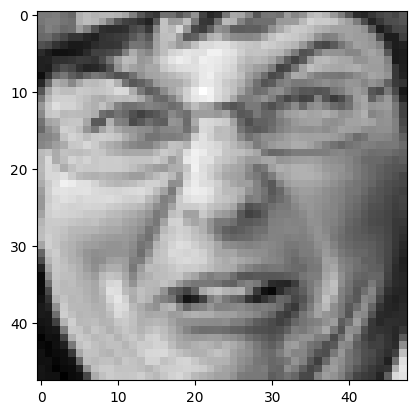

In [40]:
image = 'images/train/disgust/299.jpg'
print("original image is disgust")
img = ef(image)
pred = model.predict(img)
pred_label= label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

221/221 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step


<Figure size 800x600 with 0 Axes>

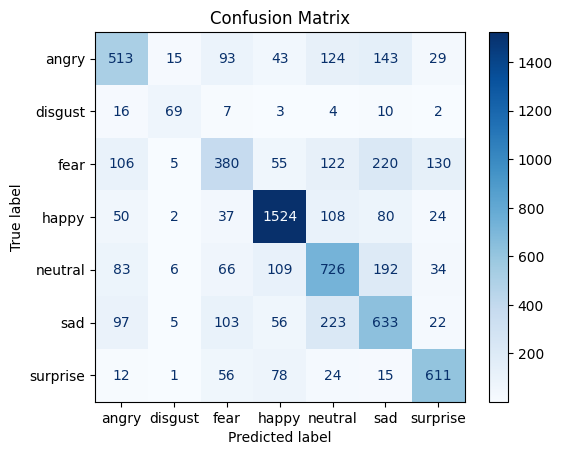

In [41]:
# Import necessary modules
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Predict the classes for the test dataset
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted labels
y_true = np.argmax(y_test, axis=1)  # True labels

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [1]:
# Extract values from the history object
tr_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss
tr_acc = history.history['accuracy']  # Training accuracy
val_acc = history.history['val_accuracy']  # Validation accuracy

# Get the number of epochs
Epochs = range(1, len(tr_loss) + 1)

# Find the lowest validation loss and highest validation accuracy
val_lowest = min(val_loss)
index_loss = val_loss.index(val_lowest)
loss_label = f'Lowest val_loss: {val_lowest:.4f}'

acc_highest = max(val_acc)
index_acc = val_acc.index(acc_highest)
acc_label = f'Highest val_acc: {acc_highest:.4f}'

# Plot the graphs
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'history' is not defined

In [10]:
train_size = len(train)
test_size = len(test)
ratio = test_size / (train_size + test_size)
print(f"Train-test split ratio: {ratio}")



Train-test split ratio: 0.19689581185387467
